In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.utilities import fetch_data
from utils.envs import TradingEnv1

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
%matplotlib inline

---

In [5]:
data = fetch_data('./data/HistoricalPriceData.db')

In [6]:
size = 500
idx = np.random.randint(0, len(data['fb'])-size)

for t in data:
    data[t] = data[t].iloc[idx: idx+size]
    data[t].reset_index(drop=True, inplace=True)

In [7]:
env = TradingEnv1(data)

In [8]:
positions = env.positions

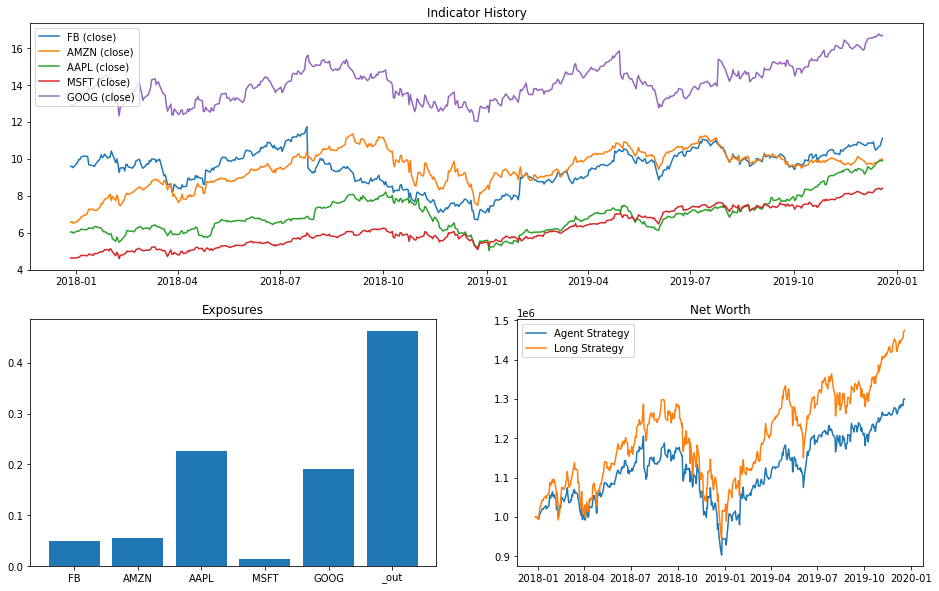

In [9]:
for episode in np.arange(3):

    done = False
    obs = env.reset()

    while not done:
        
        print(episode+1, env.current_step)

        actions = env.format_action(
            positions,
            env.action_space.sample(),
        )

        obs, reward, done, info = env.step(actions)

        env.render()
    